In [2]:
import os
import shutil #쉘 명령문을 위해서 shell util 을 사용
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers, models

# colab 에서는 이렇게 쓴다
#from google.colab import drive
#drive.mount('/conetent/drive') #이거는 구글드라이브에 있는 폴더를 마운트하는거임

In [3]:
#original Data Path
#./는 현재 디렉토리를 말하는것
original_dataset_dir = './datasets/train'

In [4]:
#small dataset path
base_dir = './datasets/cats_and_dogs_small'

if os.path.exists(base_dir):
    shutil.rmtree(base_dir)
os.mkdir(base_dir)

In [13]:
# train, vaildation, test data 폴더
train_dir = os.path.join(base_dir,'train')
os.mkdir(train_dir)
vaildation_dir = os.path.join(base_dir,'vaildation')
os.mkdir(vaildation_dir)
test_dir = os.path.join(base_dir,'test')
os.mkdir(test_dir)

In [16]:
train_cats_dir = os.path.join(train_dir,'cats')
train_dogs_dir = os.path.join(train_dir,'dogs')
validation_cats_dir = os.path.join(validation_dir,'cats')
validation_dogs_dir = os.path.join(validation_dir,'dogs')

test_cats_dir=os.path.join(test_dir,'cats')
test_dogs_dir=os.path.join(test_dir,'dogs')


os.mkdir(train_cats_dir)
os.mkdir(train_dogs_dir)
os.mkdir(validation_cats_dir)
os.mkdir(validation_dogs_dir)
os.mkdir(test_cats_dir)
os.mkdir(test_dogs_dir)

In [17]:
#file copy

#fnames = []
#for i in range(1000)
#    filename = 'cat.{}.jpg'.format(i)
#    fnames.append(filename)
#print(fnames)

#고양이 이미지 데이터 복사하기
fnames = ['cat.{}.jpg'.format(i) for i in range(1000)]# 위와 같은 코드내용임
for fname in fnames:
    src = os.path.join(original_dataset_dir,fname)
    dst = os.path.join(train_cats_dir,fname)
    shutil.copyfile(src, dst)
    
 #강아지 이미지 데이터 복사   
fnames = ['dog.{}.jpg'.format(i) for i in range(1000)]
for fname in fnames:
    src = os.path.join(original_dataset_dir,fname)
    dst = os.path.join(train_dogs_dir,fname)
    shutil.copyfile(src, dst)

In [19]:
#cat validation data copy
fnames = ['cat.{}.jpg'.format(i) for i in range(1000,1500)]
for fname in fnames:
    src = os.path.join(original_dataset_dir,fname)
    dst = os.path.join(validation_cats_dir,fname)
    shutil.copyfile(src, dst)
    
fnames = ['dog.{}.jpg'.format(i) for i in range(1000,1500)]
for fname in fnames:
    src = os.path.join(original_dataset_dir,fname)
    dst = os.path.join(validation_dogs_dir,fname)
    shutil.copyfile(src, dst)
print('------- validation copy completed')

------- validation copy completed


In [20]:

#cat test data copy
fnames = ['cat.{}.jpg'.format(i) for i in range(1500,2000)]
for fname in fnames:
    src = os.path.join(original_dataset_dir,fname)
    dst = os.path.join(test_cats_dir,fname)
    shutil.copyfile(src, dst)
    
#dog
fnames = ['dog.{}.jpg'.format(i) for i in range(1500,2000)]
for fname in fnames:
    src = os.path.join(original_dataset_dir,fname)
    dst = os.path.join(test_dogs_dir,fname)
    shutil.copyfile(src, dst)
print('------- test dataset copy completed')

------- test dataset copy completed


In [22]:
print('Train cat images : ',len(os.listdir(train_cats_dir)))
print('Train dog images : ',len(os.listdir(train_dogs_dir)))
print('Validation cat images : ',len(os.listdir(validation_cats_dir)))
print('Validation dog images : ',len(os.listdir(validation_dogs_dir)))
print('Test cat images : ',len(os.listdir(test_cats_dir)))
print('Test dog images : ',len(os.listdir(test_dogs_dir)))

Train cat images :  1000
Train dog images :  1001
Validation cat images :  500
Validation dog images :  500
Test cat images :  500
Test dog images :  500


In [26]:
# build network

from tensorflow.keras import layers, models
model = models.Sequential()
model.add(layers.Conv2D(32,(3,3), activation='relu', input_shape=(150,150,3))) #맨 뒤에가 3인이유는 컬러라서 채널 3개임 흑백이면 1이겠지
model.add(layers.MaxPooling2D((2,2)))
model.add(layers.Conv2D(64,(3,3), activation='relu'))
model.add(layers.MaxPooling2D((2,2)))
model.add(layers.Conv2D(128,(3,3), activation='relu'))
model.add(layers.MaxPooling2D((2,2)))
model.add(layers.Conv2D(128,(3,3), activation='relu'))
model.add(layers.MaxPooling2D((2,2)))
model.add(layers.Flatten())
model.add(layers.Dense(512,activation='relu'))
model.add(layers.Dense(1, activation='sigmoid'))
model.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_8 (Conv2D)            (None, 148, 148, 32)      896       
_________________________________________________________________
max_pooling2d_8 (MaxPooling2 (None, 74, 74, 32)        0         
_________________________________________________________________
conv2d_9 (Conv2D)            (None, 72, 72, 64)        18496     
_________________________________________________________________
max_pooling2d_9 (MaxPooling2 (None, 36, 36, 64)        0         
_________________________________________________________________
conv2d_10 (Conv2D)           (None, 34, 34, 128)       73856     
_________________________________________________________________
max_pooling2d_10 (MaxPooling (None, 17, 17, 128)       0         
_________________________________________________________________
conv2d_11 (Conv2D)           (None, 15, 15, 128)      

In [27]:
from tensorflow.keras import optimizers
model.compile(optimizer = 'rmsprop', loss='binary_crossentropy', metrics=['acc'])

In [29]:
# Data preprocessing

#image scaling 이미지 크기 맞춰주기
from tensorflow.keras.preprocessing.image import ImageDataGenerator

train_datagen = ImageDataGenerator(rescale = 1./255) #이건 비율
validation_datagen = ImageDataGenerator(rescale = 1./255)

train_generator = train_datagen.flow_from_directory(train_dir, target_size=(150,150),batch_size=20, class_mode='binary')#실제 픽셀이 150,150크기로 변함

validation_generator = validation_datagen.flow_from_directory(test_dir, target_size=(150,150),batch_size=20, class_mode='binary')

Found 2000 images belonging to 2 classes.
Found 1000 images belonging to 2 classes.


In [30]:
train_generator

In [32]:
for data_batch, labels_batch in train_generator:
    print('batch data size:',data_batch.shape)
    print('batch label size', labels_batch.shape)
    break

batch data size: (20, 150, 150, 3)
batch label size (20,)


In [36]:
history = model.fit_generator(train_generator,steps_per_epoch=100,epochs = 30,validation_data = validation_generator,validation_steps = 50
)

Epoch 1/30
100/100 [==============================] - 55s 552ms/step - loss: 0.7560 - acc: 0.5065 - val_loss: 0.6905 - val_acc: 0.5570
Epoch 2/30
100/100 [==============================] - 49s 491ms/step - loss: 0.6962 - acc: 0.5740 - val_loss: 0.6972 - val_acc: 0.5690
Epoch 3/30
100/100 [==============================] - 49s 491ms/step - loss: 0.6410 - acc: 0.6635 - val_loss: 0.6159 - val_acc: 0.6770
Epoch 4/30
100/100 [==============================] - 49s 491ms/step - loss: 0.5819 - acc: 0.7010 - val_loss: 0.6048 - val_acc: 0.6740
Epoch 5/30
100/100 [==============================] - 49s 489ms/step - loss: 0.5373 - acc: 0.7545 - val_loss: 0.5394 - val_acc: 0.7270
Epoch 6/30
100/100 [==============================] - 49s 492ms/step - loss: 0.4501 - acc: 0.7775 - val_loss: 0.6066 - val_acc: 0.7040
Epoch 7/30
100/100 [==============================] - 49s 494ms/step - loss: 0.4107 - acc: 0.8055 - val_loss: 0.6181 - val_acc: 0.7180
Epoch 8/30
100/100 [==============================] - 4

In [37]:
model.save('cats_and_dogs_small_1.0.h5')#케라스 확장자 이름이  h5임

Text(0.5, 1.0, 'Training and validation loss')

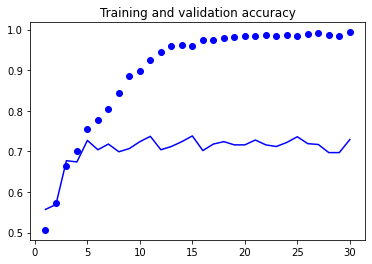

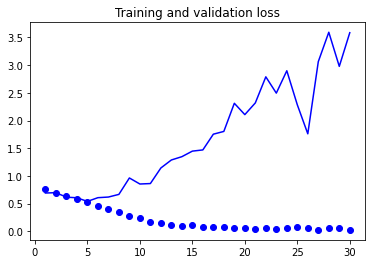

In [39]:
import matplotlib.pyplot as plt

acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss =history.history['val_loss']

epochs = range(1,len(acc)+1)

plt.plot(epochs, acc, 'bo', label='Training accuracy')
plt.plot(epochs, val_acc, 'b-', label ='Validation accuracy')
plt.title('Training and validation accuracy')

plt.figure()
plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b-', label ='Validation loss')
plt.title('Training and validation loss')

In [40]:
datagen = ImageDataGenerator(rotation_range=40, width_shift_range=0.2,height_shift_range=0.2, shear_range=0.2, zoom_range=0.2, horizontal_flip=True,fill_mode='nearest') #이미지 조작을 통한 데이터 늘리기, 크기, 로테이션, 기울기 등을 조작
#horizontal_flip 은 좌우반전 fillmode 는 빈칸 채우기


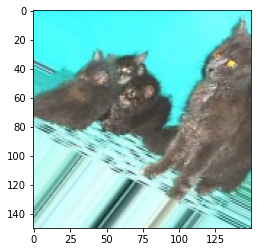

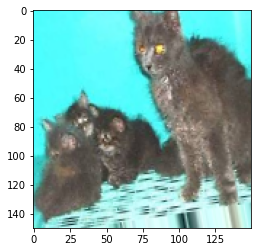

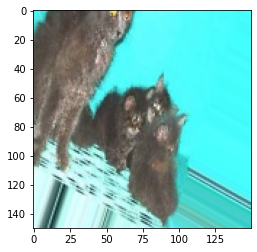

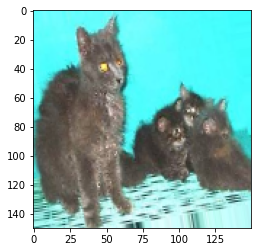

In [48]:
from tensorflow.keras.preprocessing import image

fnames = sorted([os.path.join(train_cats_dir,fname) for fname in os.listdir(train_cats_dir)])

img_path = fnames[4]

img = image.load_img(img_path, target_size=(150,150))
x = image.img_to_array(img)
x = x.reshape((1,)+ x.shape)

i = 0 
for batch in datagen.flow(x, batch_size = 1):
    plt.figure(i)
    imgplot = plt.imshow(image.array_to_img(batch[0]))
    i += 1
    if i%4 ==0:
        break
plt.show()

In [56]:
train_datagen = ImageDataGenerator(rescale=1./255,rotation_range=40,width_shift_range=0.2,height_shift_range=0.2,shear_range=0.2,zoom_range=0.2,horizontal_flip=True,)
# 검증 데이터는 증식되어서는 안 됩니다!
test_datagen = ImageDataGenerator(rescale=1./255) 
train_generator = train_datagen.flow_from_directory(train_dir, target_size=(150, 150),  batch_size=32,class_mode='binary')        
# 타깃 디렉터리        

# 모든 이미지를 150 × 150 크기로 바꿉니다        
       
# binary_crossentropy 손실을 사용하기 때문에 이진 레이블을 만들어야 합니다        


validation_generator = test_datagen.flow_from_directory(validation_dir,target_size=(150, 150),batch_size=32,class_mode='binary')
history = model.fit_generator(train_generator,steps_per_epoch=50,epochs=30,validation_data=validation_generator,validation_steps=50)

Found 2000 images belonging to 2 classes.
Found 1000 images belonging to 2 classes.
Epoch 1/30
50/50 [==============================] - 39s 778ms/step - loss: 0.6282 - acc: 0.6604 - val_loss: 0.5529 - val_acc: 0.7090
Epoch 2/30
50/50 [==============================] - 39s 772ms/step - loss: 0.6116 - acc: 0.6824 - val_loss: 0.5643 - val_acc: 0.7290
Epoch 3/30
50/50 [==============================] - 39s 776ms/step - loss: 0.6224 - acc: 0.6730 - val_loss: 0.7043 - val_acc: 0.6530
Epoch 4/30
50/50 [==============================] - 39s 784ms/step - loss: 0.6036 - acc: 0.6742 - val_loss: 0.6013 - val_acc: 0.7000
Epoch 5/30
50/50 [==============================] - 38s 770ms/step - loss: 0.6001 - acc: 0.6970 - val_loss: 0.5312 - val_acc: 0.7660
Epoch 6/30
50/50 [==============================] - 39s 778ms/step - loss: 0.5814 - acc: 0.7125 - val_loss: 0.4859 - val_acc: 0.7650
Epoch 7/30
50/50 [==============================] - 39s 777ms/step - loss: 0.5617 - acc: 0.7304 - val_loss: 0.5654 - v